In [5]:
# Import Required libraries
import pandas as pd
import numpy as np
from scipy.stats import skew, randint
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score

import joblib
import pickle

In [2]:
df = pd.read_csv(r'dataset/Combined_dataset.csv')
df

,Store,Type,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Is_MarkUp,Week_Number,IsHoliday,CPI,Unemployment,Day,Month,Year,Weekly_Sales
0,1,A,1,151315,42.31,2.572,18683.349,3860.3506,189.2324,17729.6443,7457.4603,0,5,No Holiday,211.096358,8.106000,5,2,2010,24924.5000
1,1,A,2,151315,42.31,2.572,18683.349,3860.3506,189.2324,17729.6443,7457.4603,0,5,No Holiday,211.096358,8.106000,5,2,2010,50605.2700
2,1,A,3,151315,42.31,2.572,18683.349,3860.3506,189.2324,17729.6443,7457.4603,0,5,No Holiday,211.096358,8.106000,5,2,2010,13740.1200
3,1,A,4,151315,42.31,2.572,18683.349,3860.3506,189.2324,17729.6443,7457.4603,0,5,No Holiday,211.096358,8.106000,5,2,2010,39954.0400
4,1,A,5,151315,42.31,2.572,18683.349,3860.3506,189.2324,17729.6443,7457.4603,0,5,No Holiday,211.096358,8.106000,5,2,2010,32229.3800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536629,45,B,93,118221,76.06,3.804,212.020,851.7300,2.0600,10.8800,1864.5700,0,30,No Holiday,193.491386,8.590008,26,7,2013,3510.0983
536630,45,B,94,118221,76.06,3.804,212.020,851.7300,2.0600,10.8800,1864.5700,0,30,No Holiday,193.491386,8.590008,26,7,2013,4270.7635
536631,45,B,95,118221,76.06,3.804,212.020,851.7300,2.0600,10.8800,1864.5700,0,30,No Holiday,193.491386,8.590008,26,7,2013,57230.8043
536632,45,B,97,118221,76.06,3.804,212.020,851.7300,2.0600,10.8800,1864.5700,0,30,No Holiday,193.491386,8.590008,26,7,2013,5867.4877


In [3]:
# Christmas holiday introduces as the last days of the year. But people generally shop at 51th week.
# So, when we look at the total sales of holidays, Thankgiving has higher sales between them which was assigned by Walmart.

df['IsHoliday'] = np.where(df['Week_Number'] == 6, 'Super Bowl',
                                    np.where(df['Week_Number'] == 36, 'Labor Day',
                                    np.where(df['Week_Number'] == 47, 'Thanksgiving',
                                    np.where(df['Week_Number'] == 51, 'Christmas',  'No Holiday'))))

In [4]:
# Converting Categorical data into Numerical data.


Type = {'A':1, "B":2, 'C':3}
holiday = {'No Holiday':0, 'Super Bowl':1, 'Labor Day':2, 'Thanksgiving':3, 'Christmas':4}

df['Type'] = df['Type'].map(Type).astype(int)
df['IsHoliday'] = df['IsHoliday'].map(holiday).astype(int)

df.head()


,Store,Type,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Is_MarkUp,Week_Number,IsHoliday,CPI,Unemployment,Day,Month,Year,Weekly_Sales
0,1,1,1,151315,42.31,2.572,18683.349,3860.3506,189.2324,17729.6443,7457.4603,0,5,0,211.096358,8.106,5,2,2010,24924.50
1,1,1,2,151315,42.31,2.572,18683.349,3860.3506,189.2324,17729.6443,7457.4603,0,5,0,211.096358,8.106,5,2,2010,50605.27
2,1,1,3,151315,42.31,2.572,18683.349,3860.3506,189.2324,17729.6443,7457.4603,0,5,0,211.096358,8.106,5,2,2010,13740.12
3,1,1,4,151315,42.31,2.572,18683.349,3860.3506,189.2324,17729.6443,7457.4603,0,5,0,211.096358,8.106,5,2,2010,39954.04
4,1,1,5,151315,42.31,2.572,18683.349,3860.3506,189.2324,17729.6443,7457.4603,0,5,0,211.096358,8.106,5,2,2010,32229.38


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536634 entries, 0 to 536633
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         536634 non-null  int64  
 1   Type          536634 non-null  int32  
 2   Dept          536634 non-null  int64  
 3   Size          536634 non-null  int64  
 4   Temperature   536634 non-null  float64
 5   Fuel_Price    536634 non-null  float64
 6   MarkDown1     536634 non-null  float64
 7   MarkDown2     536634 non-null  float64
 8   MarkDown3     536634 non-null  float64
 9   MarkDown4     536634 non-null  float64
 10  MarkDown5     536634 non-null  float64
 11  Is_MarkUp     536634 non-null  int64  
 12  Week_Number   536634 non-null  int64  
 13  IsHoliday     536634 non-null  int32  
 14  CPI           536634 non-null  float64
 15  Unemployment  536634 non-null  float64
 16  Day           536634 non-null  int64  
 17  Month         536634 non-null  int64  
 18  Year

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,536634.0,22.208621,12.790580,1.000,11.0000,22.000000,33.00000,45.000000
Type,536634.0,1.590516,0.666882,1.000,1.0000,1.000000,2.00000,3.000000
Dept,536634.0,44.277301,30.527358,1.000,18.0000,37.000000,74.00000,99.000000
Size,536634.0,136678.550960,61007.711800,34875.000,93638.0000,140167.000000,202505.00000,219622.000000
Temperature,536634.0,58.771762,18.678716,-7.290,45.2500,60.060000,73.23000,101.950000
Fuel_Price,536634.0,3.408310,0.430861,2.472,3.0410,3.523000,3.74400,4.468000
MarkDown1,536634.0,7437.495082,7591.646541,-2781.450,2973.4700,6062.791100,9585.09410,103184.980000
MarkDown2,536634.0,2517.496886,7352.055739,-265.760,41.6000,349.990000,1626.51000,104519.540000
MarkDown3,536634.0,1310.945371,9279.959589,-179.260,17.9471,108.760000,190.60390,149483.310000
MarkDown4,536634.0,3432.133886,5715.956409,0.000,374.3700,1772.226800,4004.24540,67474.850000


In [7]:
# Idendifying Skewness value
df.skew()

Store            0.077555
Type             0.692920
Dept             0.359150
Size            -0.325016
Temperature     -0.267460
Fuel_Price      -0.313840
MarkDown1        3.911738
MarkDown2        6.320406
MarkDown3        9.339563
MarkDown4        4.555476
MarkDown5       51.652978
Is_MarkUp       12.945402
Week_Number      0.161594
IsHoliday        4.333342
CPI              0.081664
Unemployment     1.029223
Day              0.011278
Month            0.151850
Year             0.130470
Weekly_Sales     3.284996
dtype: float64

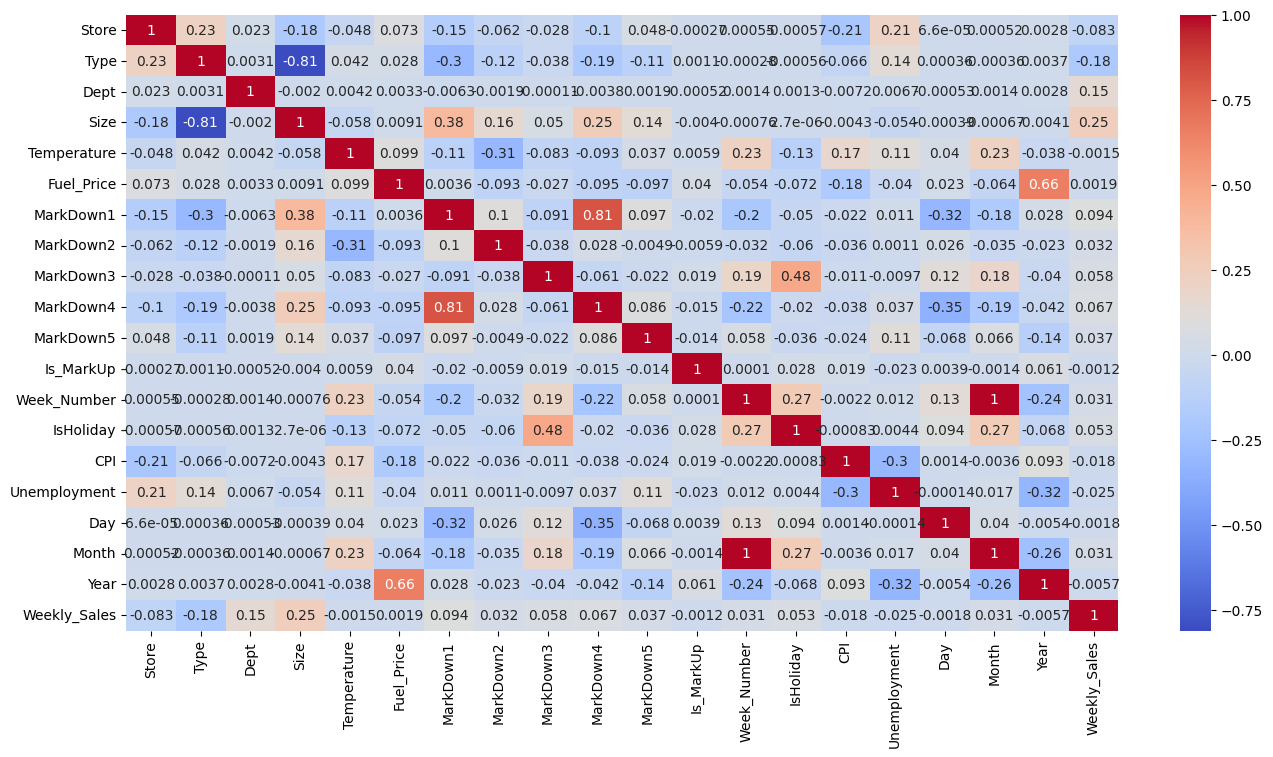

In [8]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')
plt.show()



# **Regression**

In [9]:
df

,Store,Type,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Is_MarkUp,Week_Number,IsHoliday,CPI,Unemployment,Day,Month,Year,Weekly_Sales
0,1,1,1,151315,42.31,2.572,18683.349,3860.3506,189.2324,17729.6443,7457.4603,0,5,0,211.096358,8.106000,5,2,2010,24924.5000
1,1,1,2,151315,42.31,2.572,18683.349,3860.3506,189.2324,17729.6443,7457.4603,0,5,0,211.096358,8.106000,5,2,2010,50605.2700
2,1,1,3,151315,42.31,2.572,18683.349,3860.3506,189.2324,17729.6443,7457.4603,0,5,0,211.096358,8.106000,5,2,2010,13740.1200
3,1,1,4,151315,42.31,2.572,18683.349,3860.3506,189.2324,17729.6443,7457.4603,0,5,0,211.096358,8.106000,5,2,2010,39954.0400
4,1,1,5,151315,42.31,2.572,18683.349,3860.3506,189.2324,17729.6443,7457.4603,0,5,0,211.096358,8.106000,5,2,2010,32229.3800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536629,45,2,93,118221,76.06,3.804,212.020,851.7300,2.0600,10.8800,1864.5700,0,30,0,193.491386,8.590008,26,7,2013,3510.0983
536630,45,2,94,118221,76.06,3.804,212.020,851.7300,2.0600,10.8800,1864.5700,0,30,0,193.491386,8.590008,26,7,2013,4270.7635
536631,45,2,95,118221,76.06,3.804,212.020,851.7300,2.0600,10.8800,1864.5700,0,30,0,193.491386,8.590008,26,7,2013,57230.8043
536632,45,2,97,118221,76.06,3.804,212.020,851.7300,2.0600,10.8800,1864.5700,0,30,0,193.491386,8.590008,26,7,2013,5867.4877


In [5]:
class regression:

    def __init__(self, x, y):
        # List of regression models to be evaluated
        self.models =[('AdaBoostRegressor', AdaBoostRegressor()),
                     ('RandomForestRegressor', RandomForestRegressor()),
                     ('ExtraTreesRegressor', ExtraTreesRegressor()),
                     ('GradientBoostingRegressor', GradientBoostingRegressor()),
                     ('HistGradientBoostingRegressor', HistGradientBoostingRegressor()),
                     ('DecisionTreeRegressor', DecisionTreeRegressor()),
                     ('XGBRegressor', XGBRegressor()),
                     ('LinearRegression', LinearRegression()),
                     ('KNeighborsRegressor', KNeighborsRegressor()),
                     ('MLPRegressor', MLPRegressor()),
                     ]
        # Split the data into training and testing sets
        self.x_train, self.x_test, self.y_train,self.y_test = train_test_split(x,y,test_size=0.2, random_state = 42)

    def all_model(self):
        # Train and evaluate each model
        print(self.x_train.shape, self.x_test.shape, self.y_train.shape, self.y_test.shape)
        result = []
        for model_name, model in self.models:
            model.fit(self.x_train, self.y_train)
            y_test_pred = model.predict(self.x_test)
            y_train_pred = model.predict(self.x_train)

            data ={'Model_Name': model_name,
                    'Train_Mean_Square_Error': round(mean_squared_error(self.y_train, y_train_pred),4),
                    'Test_Mean_Square_Error': round(mean_squared_error(self.y_test, y_test_pred),4),
                    'Train_Root_Mean_Square_Error': round(np.sqrt(mean_squared_error(self.y_train, y_train_pred)),2),
                    'Test_Root_Mean_Square_Error': round(np.sqrt(mean_squared_error(self.y_test, y_test_pred)),2),
                    'Train_Mean_Absolute_Error': round(mean_absolute_error(self.y_train, y_train_pred),4),
                    'Test_Mean_Absolute_Error': round(mean_absolute_error(self.y_test, y_test_pred),4),
                    'Train_R2_Score': round(r2_score(self.y_train, y_train_pred ),4),
                    'Test_R2_Score': round(r2_score(self.y_test, y_test_pred), 4)}
            result.append(data)

        self.model_score_df = pd.DataFrame(result)

        return self.model_score_df

In [6]:
# Defining Independent and dependent variable

y = df['Weekly_Sales']
x = df.drop('Weekly_Sales', axis =1)

In [13]:
# Initialize and train regression models, then evaluate their performance

regression_models = regression(x,y)
r_models = regression_models.all_model()
r_models

(429307, 19) (107327, 19) (429307,) (107327,)


,Model_Name,Train_Mean_Square_Error,Test_Mean_Square_Error,Train_Root_Mean_Square_Error,Test_Root_Mean_Square_Error,Train_Mean_Absolute_Error,Test_Mean_Absolute_Error,Train_R2_Score,Test_R2_Score
0,AdaBoostRegressor,6.738579e+08,6.828870e+08,25958.77,26132.11,22000.5663,22062.8109,-0.3062,-0.2956
1,RandomForestRegressor,1.382051e+06,1.093015e+07,1175.61,3306.08,436.5153,1176.7243,0.9973,0.9793
2,ExtraTreesRegressor,0.000000e+00,1.004702e+07,0.00,3169.70,0.0000,1174.1326,1.0000,0.9809
3,GradientBoostingRegressor,1.268317e+08,1.310770e+08,11261.96,11448.88,6927.0574,6960.7241,0.7541,0.7513
4,HistGradientBoostingRegressor,4.248713e+07,4.550593e+07,6518.22,6745.81,4032.1919,4068.6767,0.9176,0.9137
5,DecisionTreeRegressor,0.000000e+00,2.245001e+07,0.00,4738.14,0.0000,1656.3829,1.0000,0.9574
6,XGBRegressor,2.351599e+07,2.679598e+07,4849.33,5176.48,2854.2733,2938.2550,0.9544,0.9492
7,LinearRegression,4.690885e+08,4.797741e+08,21658.45,21903.75,14554.9523,14630.5297,0.0907,0.0898
8,KNeighborsRegressor,2.563995e+08,4.072716e+08,16012.48,20180.97,10047.5613,12543.4434,0.5030,0.2273
9,MLPRegressor,4.133738e+08,4.224756e+08,20331.60,20554.21,13049.2123,13104.3745,0.1987,0.1985


In [7]:
# Split the dataset into training and testing sets
regression_models = regression(x,y)
x_train, x_test, y_train, y_test = regression_models.x_train, regression_models.x_test, regression_models.y_train, regression_models.y_test
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((429307, 19), (107327, 19), (429307,), (107327,))

In [8]:
rf_model = RandomForestRegressor().fit(x_train, y_train)

y_test_pred = rf_model.predict(x_test)
y_train_pred = rf_model.predict(x_train)

data ={ 'Train_Mean_Square_Error': mean_squared_error(y_train, y_train_pred),
        'Test_Mean_Square_Error': mean_squared_error(y_test, y_test_pred),
        'Train_Root_Mean_Square_Error': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test_Root_Mean_Square_Error': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train_Mean_Absolute_Error': mean_absolute_error(y_train, y_train_pred),
        'Test_Mean_Absolute_Error': mean_absolute_error(y_test, y_test_pred),
        'Train_R2_Score': r2_score(y_train, y_train_pred ),
        'Test_R2_Score': r2_score(y_test, y_test_pred)}
data

{'Train_Mean_Square_Error': 1386207.5479353564,
 'Test_Mean_Square_Error': 11073470.848872567,
 'Train_Root_Mean_Square_Error': 1177.3731557732053,
 'Test_Root_Mean_Square_Error': 3327.6825042170967,
 'Train_Mean_Absolute_Error': 437.12273948664927,
 'Test_Mean_Absolute_Error': 1180.561256777594,
 'Train_R2_Score': 0.997312975188746,
 'Test_R2_Score': 0.9789910353434718}

In [11]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, n_iter=20)

# Fit the random search to the data
random_search.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_random = random_search.best_params_
best_rf_model_random = random_search.best_estimator_

# Make predictions on the test set using the best model
predictions_random = best_rf_model_random.predict(x_test)

# Evaluate the model
mse_random = mean_squared_error(y_test, predictions_random)
print("Best Parameters (RandomizedSearchCV):", best_params_random)
print("Mean Squared Error on Test Set:", mse_random)

Best Parameters (RandomizedSearchCV): {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 19, 'n_estimators': 127}
Mean Squared Error on Test Set: 142108352.1664071


In [12]:
random_search.best_estimator_

RandomForestRegressor(max_depth=40, max_features='log2', min_samples_split=19,
                      n_estimators=127)

In [14]:
rf_model1 = RandomForestRegressor(max_depth=40, max_features='log2', min_samples_split=19,
                                  n_estimators=127).fit(x_train, y_train)

y_test_pred = rf_model1.predict(x_test)
y_train_pred = rf_model1.predict(x_train)

data1 ={ 'Train_Mean_Square_Error': mean_squared_error(y_train, y_train_pred),
        'Test_Mean_Square_Error': mean_squared_error(y_test, y_test_pred),
        'Train_Root_Mean_Square_Error': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test_Root_Mean_Square_Error': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train_Mean_Absolute_Error': mean_absolute_error(y_train, y_train_pred),
        'Test_Mean_Absolute_Error': mean_absolute_error(y_test, y_test_pred),
        'Train_R2_Score': r2_score(y_train, y_train_pred ),
        'Test_R2_Score': r2_score(y_test, y_test_pred)}
data1

{'Train_Mean_Square_Error': 95620357.52053465,
 'Test_Mean_Square_Error': 136148368.3474039,
 'Train_Root_Mean_Square_Error': 9778.566230308748,
 'Test_Root_Mean_Square_Error': 11668.263296112404,
 'Train_Mean_Absolute_Error': 6076.479334458019,
 'Test_Mean_Absolute_Error': 7148.911382993213,
 'Train_R2_Score': 0.814649492061027,
 'Test_R2_Score': 0.7416946955754327}

In [16]:
print('RandomForestRegressor without Hyperparameter tuning')

print(data)

print('RandomForestRegressor with Hyperparameter tuning')

print(data1)

RandomForestRegressor without Hyperparameter tuning
{'Train_Mean_Square_Error': 1372354.5074656366, 'Test_Mean_Square_Error': 10911949.186838606, 'Train_Root_Mean_Square_Error': 1171.4753550398048, 'Test_Root_Mean_Square_Error': 3303.323960322179, 'Train_Mean_Absolute_Error': 437.08619981999743, 'Test_Mean_Absolute_Error': 1177.8610590819776, 'Train_R2_Score': 0.9973398279233952, 'Test_R2_Score': 0.979297479721684}
RandomForestRegressor with Hyperparameter tuning
{'Train_Mean_Square_Error': 95620357.52053465, 'Test_Mean_Square_Error': 136148368.3474039, 'Train_Root_Mean_Square_Error': 9778.566230308748, 'Test_Root_Mean_Square_Error': 11668.263296112404, 'Train_Mean_Absolute_Error': 6076.479334458019, 'Test_Mean_Absolute_Error': 7148.911382993213, 'Train_R2_Score': 0.814649492061027, 'Test_R2_Score': 0.7416946955754327}



**Mean Squared Error (MSE):**

Lower MSE values are better. The model without hyperparameter tuning has a lower test MSE, suggesting better performance in terms of minimizing squared errors.

**Root Mean Squared Error (RMSE):**

Lower RMSE values are better. Again, the model without hyperparameter tuning has a lower test RMSE.

**Mean Absolute Error (MAE):**

Lower MAE values are better. The model without hyperparameter tuning has a lower test MAE.

**R-squared (R2) Score:**

R2 score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher R2 values are better. The model without hyperparameter tuning has a higher test R2 score, indicating a better fit.

**Conclusion:**
Based on the evaluation metrics, **the model without hyperparameter tuning performs better on the test set**. It generally has lower errors (MSE, RMSE, MAE) and a higher R2 score, suggesting better predictive performance.

In [11]:
test_data = np.array([[18, 41, 95,120653, 36.33, 3.727, 1692.83, 1.5,7837.15, 579.46, 449.15, 0, 47.1, 3.0, 138.424, 8.243, 23.0, 11, 0.12]])
print('Predicted Weekly Sales Price: $', rf_model.predict(test_data)[0])

Predicted Weekly Sales Price: $ 44367.52809999999


In [12]:
# Save the Random Forest model into a  pickle file
with open('Random_Forest_Model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [2]:
# Load the Random Forest model from the file
with open('Random_Forest_Model.pkl', 'rb' ) as file:
    reg_model = pickle.load(file)


In [3]:
print('Predicted Weekly Sales Price: $', reg_model.predict(test_data)[0])

Predicted Weekly Sales Price: $ 44367.52809999999


In [11]:
import joblib

# Save the model to a compressed joblib file
joblib.dump(rf_model, 'random_forest_model.joblib.gz', compress=('gzip', 3))


['random_forest_model.joblib.gz']

In [1]:

loaded_model = joblib.load('random_forest_model.joblib.gz')


In [6]:

test_data = np.array([[18, 41, 95,120653, 36.33, 3.727, 1692.83, 1.5,7837.15, 579.46, 449.15, 0, 47.1, 3.0, 138.424, 8.243, 23.0, 11, 0.12]])


print('Predicted Weekly Sales Price: $', loaded_model.predict(test_data)[0])

Predicted Weekly Sales Price: $ 44533.939272999996
